<a href="https://colab.research.google.com/github/sheikyabooti/notes/blob/master/Ladder_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ladder Simulator



In [1]:
%pip install trueskill

  Created wheel for trueskill: filename=trueskill-0.4.5-py3-none-any.whl size=18046 sha256=c4c1ff972e5821b51d2456d295f8104492b9dff80accbf85ff3004f18bdb7683
  Stored in directory: /root/.cache/pip/wheels/bf/cb/b7/441dde3542ccda9474afc6b53b81da197b0867e56e0dae7e09
Successfully built trueskill


In [2]:
!pip install git+https://github.com/OpenDebates/openskill.py.git --ignore-requires-python

  Cloning https://github.com/OpenDebates/openskill.py.git to /tmp/pip-req-build-_s7zscpf
  Running command git clone -q https://github.com/OpenDebates/openskill.py.git /tmp/pip-req-build-_s7zscpf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 38.2 MB 24 kB/s 
  Created wheel for openskill: filename=openskill-0.1.0a2-py3-none-any.whl size=41838 sha256=f024e1def61c3e8d1319a23112163435455473e802c606f660cf2b15834711da
  Stored in directory: /tmp/pip-ephem-wheel-cache-6ls4sgu5/wheels/f3/bb/b1/b969692a4edf7a6687a484c71bdad3da87114b99a0daac50df
Successfully built openskill
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depende

In [4]:
from numpy.linalg import norm

class Kmeans:

  # --
  def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter

  # -- initializes an array of centroids set to a radom sample from X
  def initialize_centroids(self, X):
    centroids = np.zeros((self.k, X.shape[1]))

    random_idx = np.random.permutation(X.shape[0])
    centroids = X[random_idx[:self.k]]

    return centroids

  # -- computes distance from each element to each centroid
  def compute_distance(self, X):
    distance = np.zeros((X.shape[0], self.k))
    for i in range(self.k):

      row_norm = norm(X - self.centroids[i,:], axis=1)
      
      distance[:, i] = np.square(row_norm)

    return distance

  # -- finds the index of the nearest centroid
  def find_closest_cluster(self, distance):
    return np.argmin(distance, axis=1)

  # -- computes the centroids of each region
  def compute_centroids(self, X):
    centroids = np.zeros((self.k, X.shape[1]))

    for i in range(self.k):
      centroids[i, :] = np.mean(X[self.labels == i, :], axis=0)

    return centroids

  # -- computers the error of the partition 
  def compute_sse(self, X, labels, centroids):
      distance = np.zeros(X.shape[0])
      for i in range(self.k):
          distance[labels == i] = norm(X[labels == i] - centroids[i], axis=1)
      return np.sum(np.square(distance))    

  # k-means clustering algorithm
  def fit(self, X):
    # standardize input

    self.centroids = self.initialize_centroids(X)

    for i in range(self.max_iter):
      prev_centroids = self.centroids
      distance = self.compute_distance(X)
      self.labels = self.find_closest_cluster(distance)

      self.centroids = self.compute_centroids(X)

      if np.all(prev_centroids == self.centroids):
        break

    self.error = self.compute_sse(X, self.labels, self.centroids)  

X_std shape(272, 2)


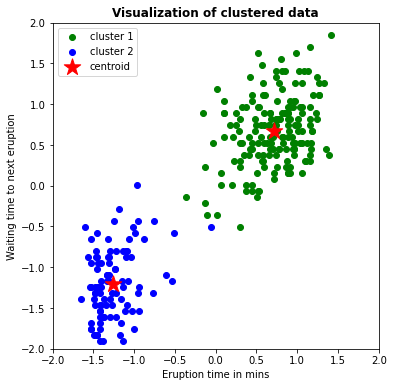

In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import numpy as np

my_data = np.genfromtxt('old_faithful.csv', delimiter=',')

# trim off the axes names
my_data = my_data[1:,:]

# Standardize the data
X_std = StandardScaler().fit_transform(my_data)

print('X_std shape' + str(X_std.shape))
#print(X_std)

km = Kmeans(k=2, max_iter=100)
km.fit(X_std)

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(km.centroids[:, 0], km.centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

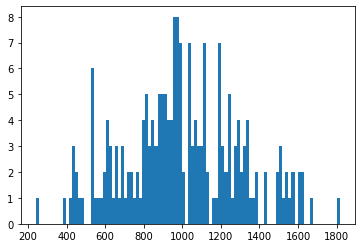

setting up players
simulating matches


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


best is 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ack
evaluating players


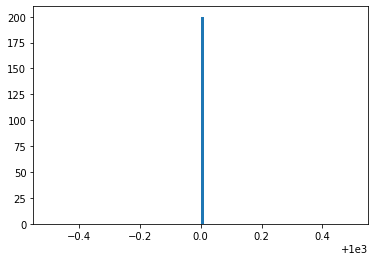

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


best is 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ack
evaluating players


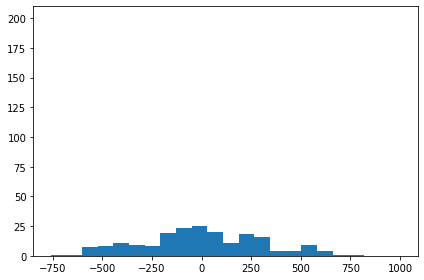

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


best is 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ack
evaluating players


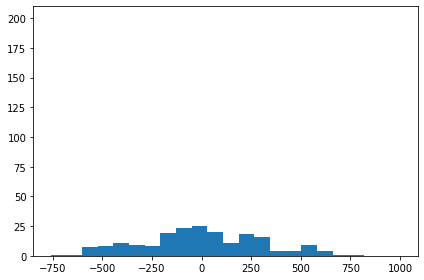

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


best is 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ack
evaluating players


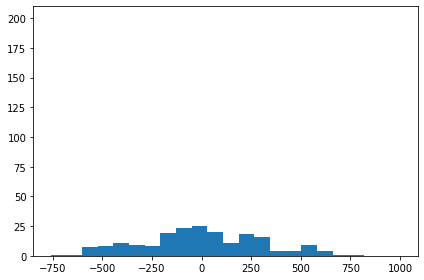

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


best is 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ack
evaluating players


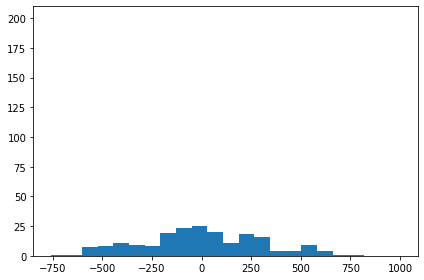

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


best is 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ack
evaluating players


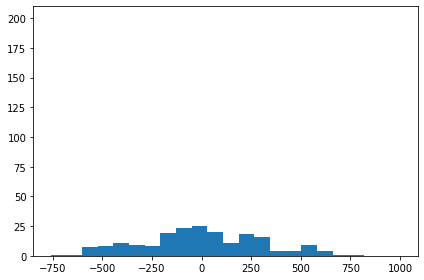

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


best is 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ack
evaluating players


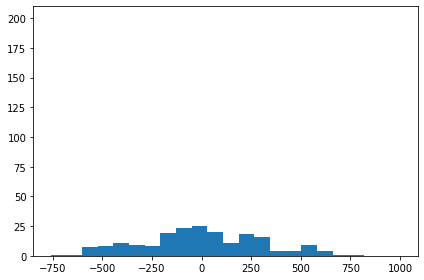

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


best is 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ack
evaluating players


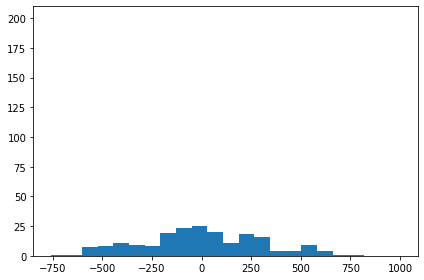

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


best is 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ack
evaluating players


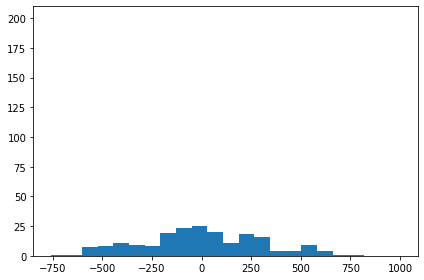

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


best is 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ack
evaluating players


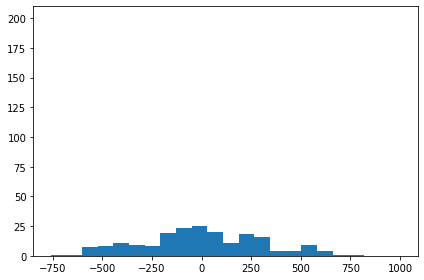

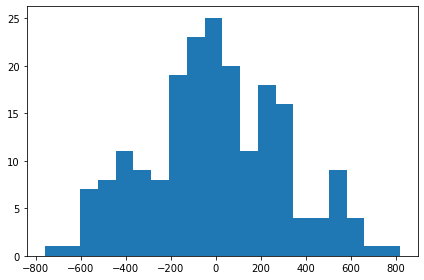

In [7]:
#from openskill import Rating, rate
#from openskill.models import PlackettLuce

#from trueskill import Rating, quality_1vs1, rate_1vs1

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import random
import math
import openskill as openskill
import trueskill as ts

from scipy.stats import norm as norm2

import itertools

from sklearn.preprocessing import StandardScaler

BETA = 4.17


# -- 
def total_skill(team):
    
    total = 0

    for i, player in enumerate(team):
        total += player.mu

    return total

# -- 
def total_sigma(team):
    total = 0
 
    for i, player in enumerate(team):
        total += player.sigma
        
    return total

# -- 
def win_probability(team0, team1, teamsize):
    total0 = total_skill(team0)
    total1 = total_skill(team1)
    
    sigma0 = total_sigma(team0)
    sigma1 = total_sigma(team1)
    
    deltaMu = total0 - total1
    sumSigma = sigma0 + sigma1
 
    playercount = teamsize * 2

    denominator = math.sqrt(playercount * (BETA * BETA) + sumSigma)
    
    return norm2.cdf(deltaMu/denominator)

    
# -- 
def select_matches(teamsize, num_matches):


  num_teams = int(NUM_PLAYERS / teamsize)
  NUM_FEATURES = 2 # mu, sigma

  tmpskill = []
  for i in range(NUM_PLAYERS):
    tmpskill.append(np.array([os_ratings[i].mu, os_ratings[i].sigma]))

  skill = np.asarray(tmpskill)
  X_std = StandardScaler().fit_transform(skill)


  labels = []
  errors = []

  NUM_KMEANS_RUNS = 10
  for i in range(NUM_KMEANS_RUNS):
    km = Kmeans(k=num_teams, max_iter=100)
    km.fit(X_std)
    
    labels.append(km.labels)
    errors.append(km.error)

  best = np.argmin(errors)

  print('best is ' + str(best))

  print(errors)
  print('ack')    

  teams = []
  for i in range(num_teams):
    teams.append([])

  teamlabels = labels[best]

  for playerid, team in enumerate(teamlabels):
    teams[team].append(playerid)

  small_teams = []
  loose_players = []

  # trim teams down to size
  for i in range(num_teams):
    cur = teams[i]
    team_size = len(cur)

    if team_size < teamsize:
      small_teams.append(cur)
    elif team_size > teamsize:
      diff = team_size - teamsize

      for j in range(diff):
        # -- TODO: choose furthest team member from centroid
        loose = cur[len(cur)-1]

        cur = cur[:len(cur)-1]

        tmp = teams[i]
        loose_players.append(loose)

      teams[i] = cur[0:teamsize]

  # distribute loose players into closest teams
  for i, curteam in enumerate(small_teams):
    diff = teamsize - len(curteam)
    for j in range(diff):

      tmp = loose_players[len(loose_players)-1]

      # -- TODO choose closest loose player
      curteam.append(loose_players[len(loose_players) - 1])
      loose_players = loose_players[:len(loose_players)-1]

      teams[i] = curteam


  # -- validate teams
  # should be sized 4, and disjoint
  for i in range(num_teams):
    curteam = teams[i]

    if len(curteam) != teamsize:
      print('fail teamsize ' + str(i) + ' ' + str(len(curteam)))

      for tmp, curplayer in enumerate(curteam):
        for j in range(num_teams):
          if i != j and curplayer in teams[j]:
            print('fail duplicate' + str(i) + ' ' + str(j))

    team_skill_totals = []
    for i in range(num_teams):
      totalskill = 0
      for j, playerid in enumerate(teams[i]):
        totalskill += os_ratings[i].mu

      team_skill_totals.append(totalskill)  

    teamskills = np.asarray(team_skill_totals)

    # -- build the cost of each pairing
    matchmatrix = []
    for i in range(num_teams):
      matchcost = []

      for j in range(num_teams):
        cost = teamskills[i] - teamskills[j]

        if i == j:
          cost = 100000000
        matchcost.append(np.square(cost))      

      matchmatrix.append(np.asarray(matchcost))
    matchmatrix = np.asarray(matchmatrix)

    matchedteams = set()

    minteam = np.argmin(matchmatrix, axis=0)

    matches = []
    match_costs = []

    for i in range(num_teams):

      if i in matchedteams:
        continue

      j = minteam[i]

      if j in matchedteams:
        continue
      
      matchedteam = []
      matchedteam.append(teams[i])
      matchedteam.append(teams[j])
      cost = np.square(teamskills[i] - teamskills[j])
      match_costs.append(cost)

  return matches, match_costs


NUM_PLAYERS = 200

population_mu = 1000 # mean
population_sigma = 300 # standard deviation
truemmr = np.random.normal(population_mu, population_sigma, NUM_PLAYERS)

plt.hist(truemmr, bins = 100) 
plt.show()

NUM_UPDATES = 10
MATCHES_PER_UPDATE = 1
TEAM_SIZE = 4

# -- set up the hidden skill variable
print('setting up players')
ts_ratings = []
os_ratings = []
for i in range(NUM_PLAYERS):
    ts_ratings.append(ts.Rating(mu=truemmr[i]))
    os_ratings.append(openskill.Rating(1000,300))

#plt.hist(truemmr, bins = 100)    
#plt.show()
    
print('simulating matches')
for i in range(NUM_UPDATES):
  teamsize = TEAM_SIZE
  matches_per_update = MATCHES_PER_UPDATE

  # -- select a batch of matches
  matches, match_costs = select_matches(teamsize, matches_per_update)
    
  for match in matches:
    teamids0 = match[0]
    teamids1 = match[1]
    
    team0 = []
    for i, curid in enumerate(teamids0):
        team0.append(os_ratings[curid])
        
    team1 = []
    for i, curid in enumerate(teamids1):
        team1.append(os_ratings[curid])
        
    winprob = win_probability(team0, team1, teamsize)
  
    # -- simulate win
    if winprob > np.random.rand():
        newteam0, newteam1 = openskill.rate([team0, team1])
    else:
        newteam1, newteam0 = openskill.rate([team1, team0])
        
    # -- update ratings for team0
    for i, curid in enumerate(teamids0):
        newrating = newteam0[i]
        os_ratings[curid] = openskill.Rating(mu=newrating[0], sigma=newrating[1])
      
    # -- update ratings for team1
    for i, curid in enumerate(teamids1):
        newrating = newteam1[i]
        os_ratings[curid] = openskill.Rating(mu=newrating[0], sigma=newrating[1])
        
  end_ratings = np.zeros(NUM_PLAYERS)
  diff = np.zeros(NUM_PLAYERS)

  print('evaluating players')
  for i in range(NUM_PLAYERS):
      end_ratings[i] = os_ratings[i].mu
      diff[i] = ts_ratings[i].mu - os_ratings[i].mu
      
      
  plt.hist(end_ratings, bins = 100) 
  plt.show()
      
  n_bins = 20    
  fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
  axs.hist(diff, bins=n_bins)



In [ ]:
)import numpy as np

a = []
for i in range(5):
    a.append(np.array([1,2,3])) # or a.append([1,2,3])
a = np.asarray(a) # a list of 1D arrays (or lists) becomes a 2D array

print(a.shape)
print(a)

(5, 3)
[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
